# Visualizations - Citation Classes

In [1]:
import pandas as pd

# Load the flattened dataset
df = pd.read_csv('../2_Generation/data/flattened_citation_classes.csv')

# Total number of citations
total_records = len(df)
print(f"Total Records: {total_records}")


Total Records: 25256


In [2]:
df

,filename,citation_id,class,tocase,AustLII,text
0,08_1056.xml,c0,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,http://www.austlii.edu.au/au/cases//cth/FCA/20...,30 Ordinarily that discretion will be exercise...
1,08_1056.xml,c1,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,http://www.austlii.edu.au/au/cases//cth/FCA/19...,32 The general principles governing the exerci...
2,08_1056.xml,c2,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,NaN,30 Ordinarily that discretion will be exercise...
3,08_1056.xml,c3,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,http://www.austlii.edu.au/au/cases//cth/FCA/20...,32 The general principles governing the exerci...
4,08_1056.xml,c4,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,http://www.austlii.edu.au/au/cases//cth/FCA/20...,33 The preceding general principles inform the...
...,...,...,...,...,...,...
25251,07_163.xml,c15,cited,Reches Pty Ltd v Tadiran Pty Ltd (1998) 85 FCR...,NaN,24 That is not confined to persons who control...
25252,07_163.xml,c16,cited,Sir Lindsay Parkinson &amp; Co Ltd v Triplan L...,NaN,19 Once the threshold prescribed by s 1335 is ...
25253,07_163.xml,c17,cited,Spiel v Commodity Brokers Australia Pty Ltd (I...,NaN,19 Once the threshold prescribed by s 1335 is ...
25254,07_163.xml,c18,distinguished,"Tullock Ltd v Walker (Unreported, Supreme Cour...",NaN,27 Given the extent to which Deumer stands to ...


## Highest Citations in a case

In [32]:
sum(df['tocase'].value_counts().head(1000).values.tolist())

5591

In [30]:
# Count occurrences of each cited case (tocase)
highest_citations = df['tocase'].value_counts().head(1000)

# Display the top 10 most cited cases
highest_citations


tocase
Minister for Immigration and Ethnic Affairs v Wu Shan Liang [1996] HCA 6 ; (1996) 185 CLR 259        70
General Steel Industries Inc v Commissioner for Railways (NSW) [1964] HCA 69 ; (1964) 112 CLR 125    40
Minister for Aboriginal Affairs v Peko-Wallsend Ltd [1986] HCA 40 ; (1986) 162 CLR 24                39
Kioa v West [1985] HCA 81 ; (1985) 159 CLR 550                                                       37
Australian Broadcasting Tribunal v Bond [1990] HCA 33 ; (1990) 170 CLR 321                           35
                                                                                                     ..
Futuretronics.com.au Pty Limited v Graphix Labels Pty Ltd (No 2) [2008] FCA 746                       3
Guss v Johnstone (2000) 171 ALR 598                                                                   3
Suttor v Gundowda Pty Ltd [1950] HCA 35 ; (1950) 81 CLR 418                                           3
Alcatel Australia Ltd v Scarcella (1998) 44 NSWLR 349    

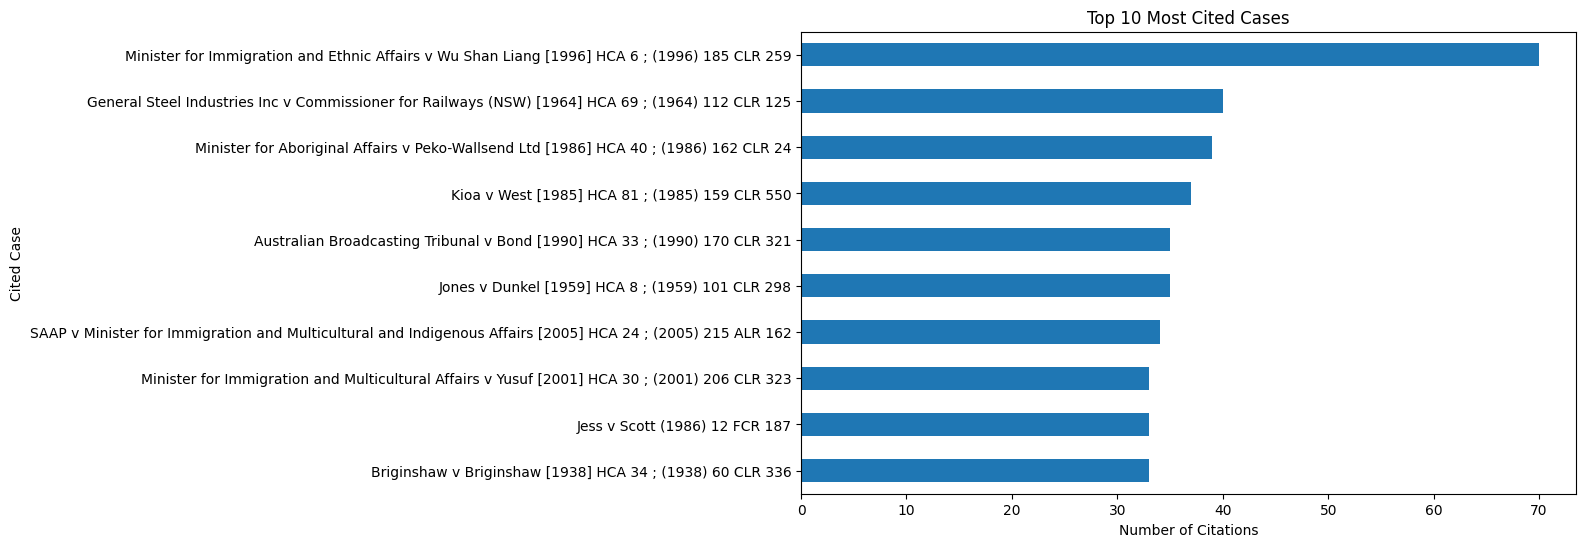

In [4]:
import matplotlib.pyplot as plt

# Bar plot for the top 10 cited cases
highest_citations.plot(kind='barh', figsize=(10, 6))
plt.title('Top 10 Most Cited Cases')
plt.xlabel('Number of Citations')
plt.ylabel('Cited Case')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


## Value Counts of Classes

class
cited            12109
referred to       4386
applied           2536
followed          2235
considered        1712
discussed         1010
distinguished      625
quoted             122
related            113
affirmed           113
approved           110
notfollowed         69
reversed            26
explained           20
questioned          16
ref to              15
disapproved         11
noted                7
relied on            4
compared             4
referred             4
doubted              2
overruled            2
adopted              2
Name: count, dtype: int64


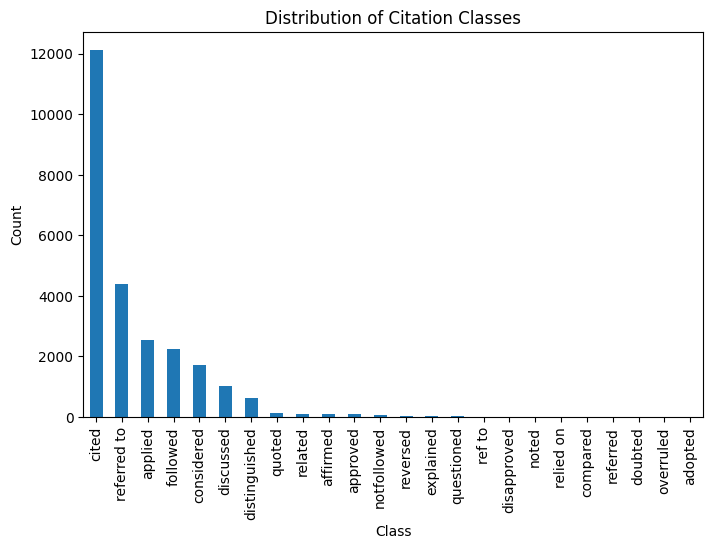

In [5]:
# Value counts of 'class' column
class_distribution = df['class'].value_counts()

# Display the class distribution
print(class_distribution)

# Plotting the class distribution
class_distribution.plot(kind='bar', figsize=(8, 5))
plt.title('Distribution of Citation Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


Classes like referred need to be harmonized

## Measure the Length of Citation Text

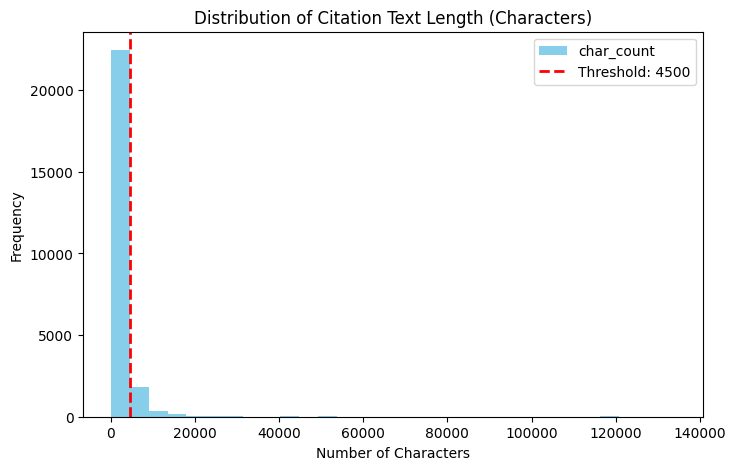

Number of citations with more than 4500 characters: 2670


In [6]:
import matplotlib.pyplot as plt

# Define the threshold for character count
threshold = 4500

# Add a new column for character count of the citation text
df['char_count'] = df['text'].str.len()

# Plot the distribution of character counts
plt.figure(figsize=(8, 5))
df['char_count'].plot(kind='hist', bins=30, color='skyblue')

# Add a vertical red line at the threshold
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=2, label=f'Threshold: {threshold}')

# Add labels and title
plt.title('Distribution of Citation Text Length (Characters)')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')

# Add a legend
plt.legend()

# Show the plot
plt.show()

# Count the number of citations with char_count greater than the threshold
count_above_threshold = df[df['char_count'] > threshold].shape[0]
print(f"Number of citations with more than {threshold} characters: {count_above_threshold}")


There are some citations with huge text chunks, which will not be considered for modelling

## Scatter Plot of Citation Length vs. Citation Class

/var/folders/nz/x14sy1sd2rj_6ltfxbm014780000gn/T/ipykernel_48547/166114389.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='class', y='char_count', data=df, palette='coolwarm', alpha=0.7)


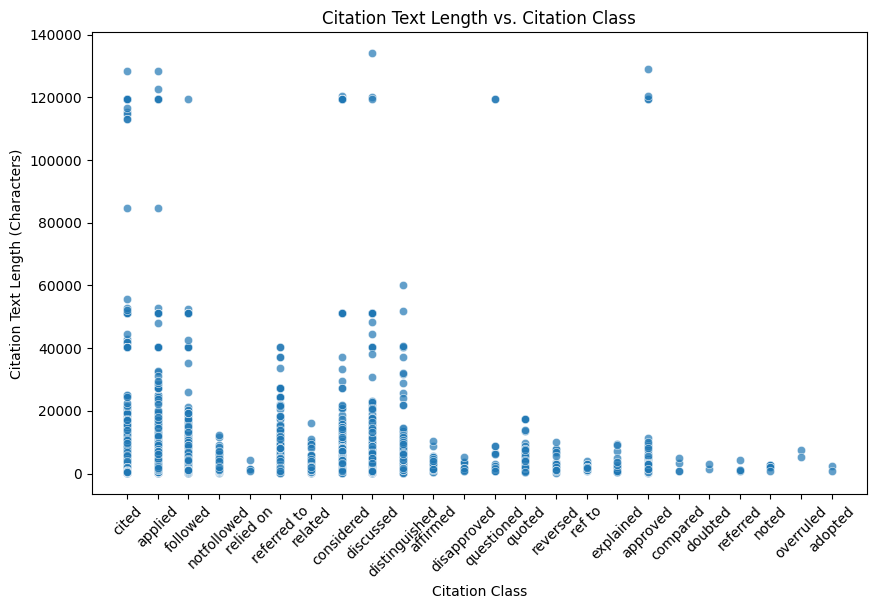

In [7]:
import seaborn as sns

# Scatter plot of citation text length by class
plt.figure(figsize=(10, 6))
sns.scatterplot(x='class', y='char_count', data=df, palette='coolwarm', alpha=0.7)
plt.title('Citation Text Length vs. Citation Class')
plt.xlabel('Citation Class')
plt.ylabel('Citation Text Length (Characters)')
plt.xticks(rotation=45)

plt.show()


## Word Cloud

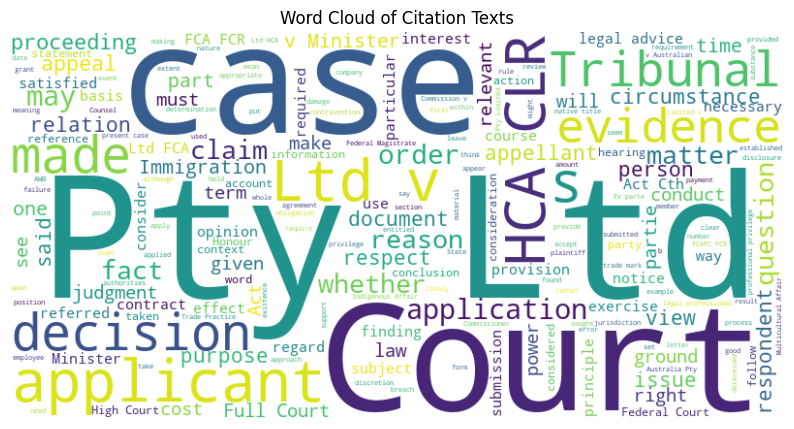

In [8]:
from wordcloud import WordCloud

# Join all citation texts into a single string
all_text = ' '.join(df['text'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.title('Word Cloud of Citation Texts')
plt.show()


In [9]:
df

,filename,citation_id,class,tocase,AustLII,text,char_count
0,08_1056.xml,c0,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,http://www.austlii.edu.au/au/cases//cth/FCA/20...,30 Ordinarily that discretion will be exercise...,431.0
1,08_1056.xml,c1,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,http://www.austlii.edu.au/au/cases//cth/FCA/19...,32 The general principles governing the exerci...,994.0
2,08_1056.xml,c2,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,NaN,30 Ordinarily that discretion will be exercise...,431.0
3,08_1056.xml,c3,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,http://www.austlii.edu.au/au/cases//cth/FCA/20...,32 The general principles governing the exerci...,994.0
4,08_1056.xml,c4,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,http://www.austlii.edu.au/au/cases//cth/FCA/20...,33 The preceding general principles inform the...,707.0
...,...,...,...,...,...,...,...
25251,07_163.xml,c15,cited,Reches Pty Ltd v Tadiran Pty Ltd (1998) 85 FCR...,NaN,24 That is not confined to persons who control...,929.0
25252,07_163.xml,c16,cited,Sir Lindsay Parkinson &amp; Co Ltd v Triplan L...,NaN,19 Once the threshold prescribed by s 1335 is ...,429.0
25253,07_163.xml,c17,cited,Spiel v Commodity Brokers Australia Pty Ltd (I...,NaN,19 Once the threshold prescribed by s 1335 is ...,429.0
25254,07_163.xml,c18,distinguished,"Tullock Ltd v Walker (Unreported, Supreme Cour...",NaN,27 Given the extent to which Deumer stands to ...,1166.0


In [ ]:
aaa